In [104]:
#mporting relevant libraries
import pandas as pd
import numpy as np
housing = pd.read_csv('bengaluru_house_prices.csv')

In [105]:
#taking a view of the data
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [106]:
#getting a brief description of the availabe data
housing.info()
#we see some of the numerical attributes exist as categorical attributes and presence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [107]:
#looking at some categorical attributes
housing['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [108]:
housing['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [109]:
housing['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [110]:
housing['society'].value_counts()
# we observe that attributes like area_type, availabity and society are not too important.

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [111]:
#Taking in our available numerical atttributes
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [210]:
#Creating a deep copy of our data for exploration purposes
housing_df = housing.copy()
housing_df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [211]:
#dropping less important attributes
housing_df.drop(['area_type','availability','society'], 
                axis =1, inplace = True)

In [251]:
housing_df.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [225]:
housing_df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [21]:
imp_cat = housing_df[['location','size']]

In [22]:
#data cleaning process begins:
#filling categorical data.
from sklearn.impute import SimpleImputer


impute_cat = SimpleImputer(strategy = 'most_frequent')
impute_cat.fit(imp_cat)
housing_df[['size','location']] = impute_cat.transform(imp_cat)

In [23]:
#checking in on data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [24]:
housing_df['size'].unique()
#checking the values in the size attribute

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
housing_df['bhk'] = housing_df['size'].apply(lambda x: int(x.split(' ')[0]))

In [26]:
housing_df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [27]:
#dropping size attribute
housing_df.drop('size', axis = 1, inplace = True)

In [28]:
#checking for outliers in the total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
#checking for outliers
housing_df[-housing_df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,NaN,NaN,192.000,4
81,Hennur Road,2957 - 3450,NaN,NaN,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,NaN,NaN,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [30]:
#fixing outliers in total_sqft
def convert_num(x):
    symbol = x.split('-')
    if len(symbol) == 2:
        return(float(symbol[0])+float(symbol[1])/2)
    try:
        return float(x)
    except:
        return None

In [31]:
housing_df['total_sqft'] = housing_df['total_sqft'].apply(convert_num) 

In [32]:
housing_df.describe()

,total_sqft,bath,balcony,price,bhk
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000
mean,1572.225941,2.692610,1.584376,112.565627,2.802778
std,1254.823072,1.341458,0.817263,148.971674,1.294496
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1280.000000,2.000000,2.000000,72.000000,3.000000
75%,1690.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [33]:
#converting price to ruby
housing_dg = housing_df.copy()
housing_dg['price'] = housing_dg['price']*10000

In [34]:
housing_dg.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,390700.0,2
1,Chikka Tirupathi,2600.0,5.0,3.0,1200000.0,4
2,Uttarahalli,1440.0,2.0,3.0,620000.0,3


In [329]:
def not_gre(bhk, bal):
        if bhk < bal or bhk == bal:
            return (bhk == bal + 2.0), bal
        else:
            return bhk,bal

In [330]:
housing_dg['bhk']= housing_dg['bhk'].apply(lambda x : float(x))

In [331]:
housing_dg.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,390700.0,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,1200000.0,4.0
2,Uttarahalli,1440.0,2.0,3.0,620000.0,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,950000.0,3.0
4,Kothanur,1200.0,2.0,1.0,510000.0,2.0


In [333]:
not_gre(housing_dg['bhk'], housing_dg['balcony'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
housing_dg.describe()

,total_sqft,bath,balcony,price,bhk
count,13274.000000,13247.000000,12711.000000,1.332000e+04,13320.000000
mean,1572.225941,2.692610,1.584376,1.125656e+06,2.802778
std,1254.823072,1.341458,0.817263,1.489717e+06,1.294496
min,1.000000,1.000000,0.000000,8.000000e+04,1.000000
25%,1100.000000,2.000000,1.000000,5.000000e+05,2.000000
50%,1280.000000,2.000000,2.000000,7.200000e+05,3.000000
75%,1690.000000,3.000000,2.000000,1.200000e+06,3.000000
max,52272.000000,40.000000,3.000000,3.600000e+07,43.000000


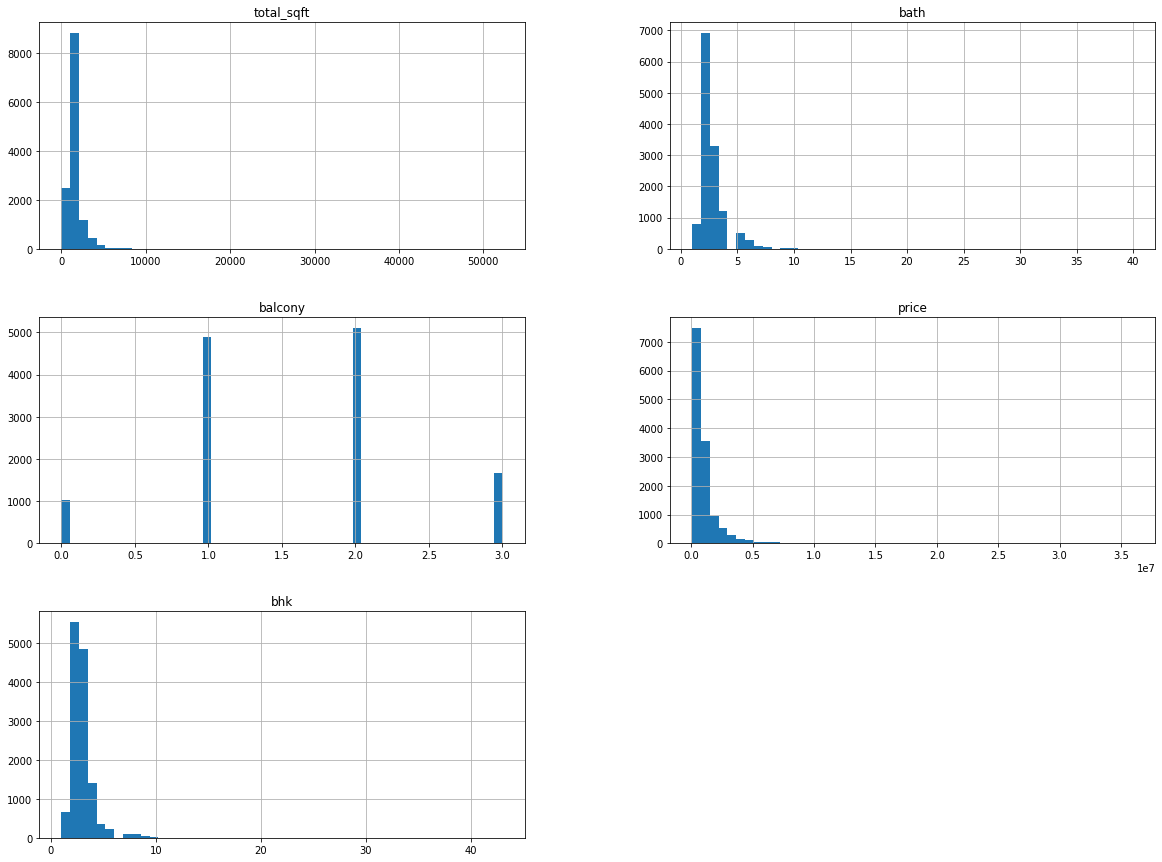

In [36]:
#plotting graphs 
%matplotlib inline
import matplotlib.pyplot as plt
housing_dg.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

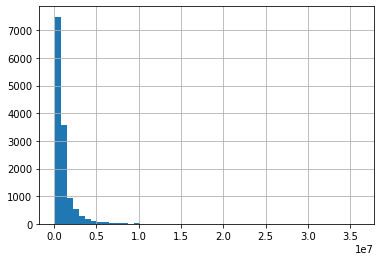

In [37]:
housing_dg['price'].hist(bins = 50)

In [38]:
corr_matrix = housing_dg.corr()

In [39]:
#looking at the correlation
corr_matrix['price'].sort_values(ascending = False)

price         1.000000
total_sqft    0.571559
bath          0.456345
bhk           0.398074
balcony       0.120355
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='total_sqft', ylabel='price'>,
        <AxesSubplot:xlabel='bath', ylabel='price'>,
        <AxesSubplot:xlabel='bhk', ylabel='price'>,
        <AxesSubplot:xlabel='balcony', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='total_sqft', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='bath', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='bhk', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='balcony', ylabel='total_sqft'>],
       [<AxesSubplot:xlabel='price', ylabel='bath'>,
        <AxesSubplot:xlabel='total_sqft', ylabel='bath'>,
        <AxesSubplot:xlabel='bath', ylabel='bath'>,
        <AxesSubplot:xlabel='bhk', ylabel='bath'>,
        <AxesSubplot:xlabel='balcony', ylabel='bath'>],
       [<AxesSubplot:xlabel='price', ylabel='bhk'>,
        <AxesSubplot:xlabel='total_sqft', ylabel='bhk'>,
        <AxesSubplot:xlabel='bath', ylabel='bh

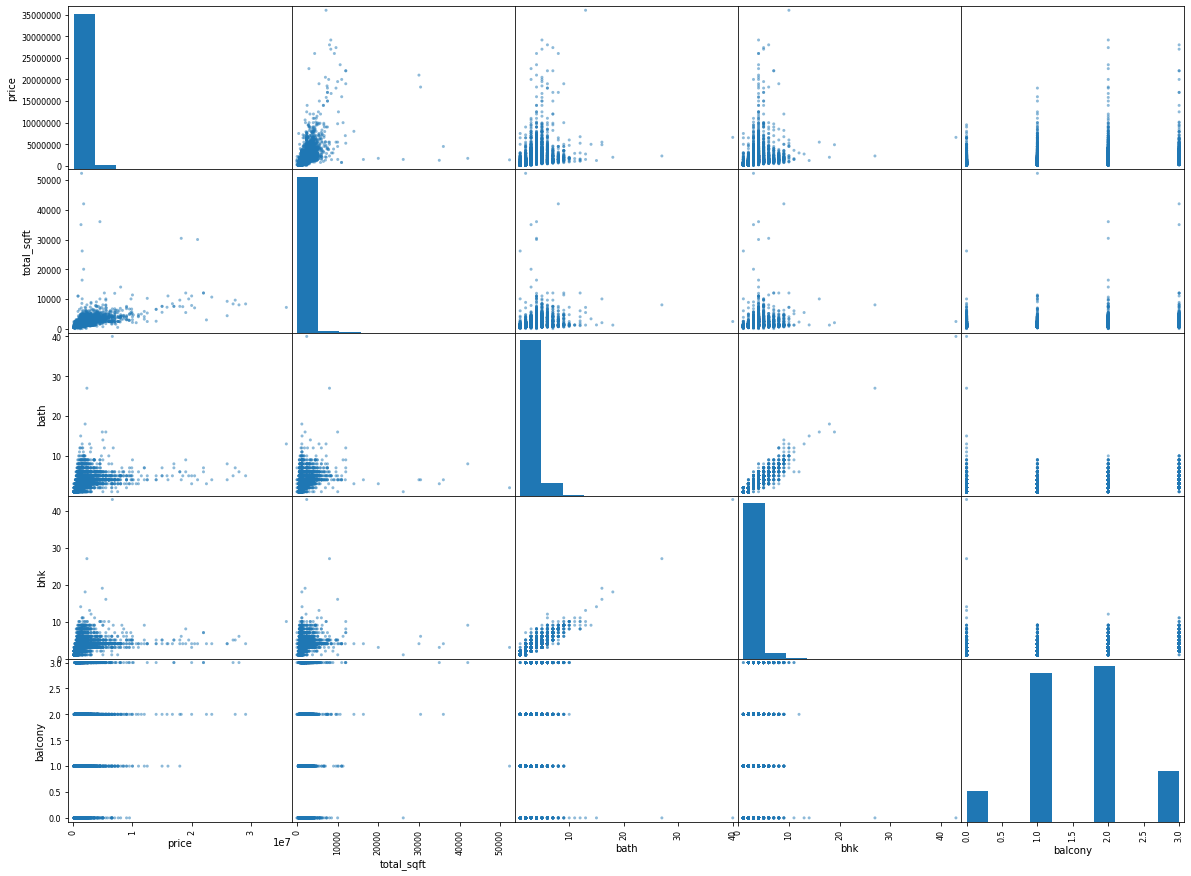

In [40]:
#plotting a correlation curve
from pandas.plotting import scatter_matrix

attributes = ['price','total_sqft','bath','bhk','balcony']
scatter_matrix(housing_dg[attributes], figsize=(20, 15))

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

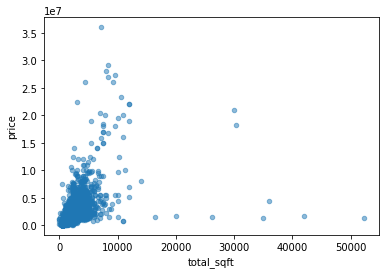

In [41]:
housing_dg.plot(kind = 'scatter', x = 'total_sqft', y ='price', alpha = 0.5)

<AxesSubplot:xlabel='bhk', ylabel='price'>

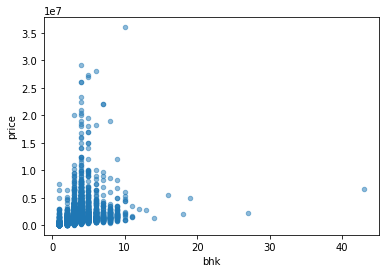

In [42]:
housing_dg.plot(kind = 'scatter', x = 'bhk', y ='price', alpha = 0.5)

<AxesSubplot:xlabel='bhk', ylabel='bath'>

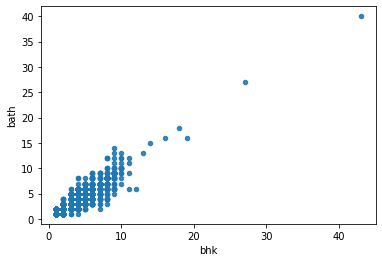

In [43]:
housing_dg.plot(kind = 'scatter', x = 'bhk', y ='bath', alpha = 0.9)

In [44]:
housing_dg[housing_dg['total_sqft']/housing_dg['bhk']<300]

,location,total_sqft,bath,balcony,price,bhk
9,Gandhi Bazar,1020.0,6.0,NaN,3700000.0,6
45,HSR Layout,600.0,9.0,NaN,2000000.0,8
58,Murugeshpalya,1407.0,4.0,1.0,1500000.0,6
68,Devarachikkanahalli,1350.0,7.0,0.0,850000.0,8
70,Double Road,500.0,3.0,2.0,1000000.0,3
...,...,...,...,...,...,...
13277,Kundalahalli Colony,1400.0,7.0,NaN,2180000.0,7
13279,Vishwanatha Nagenahalli,1200.0,5.0,NaN,1300000.0,6
13281,Margondanahalli,1375.0,5.0,1.0,1250000.0,5
13303,Vidyaranyapura,774.0,5.0,3.0,700000.0,5


In [45]:
housing_dh = housing_dg[~(housing_dg['total_sqft']/housing_dg['bhk']<300)]

In [46]:
housing_dh

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,390700.0,2
1,Chikka Tirupathi,2600.0,5.0,3.0,1200000.0,4
2,Uttarahalli,1440.0,2.0,3.0,620000.0,3
3,Lingadheeranahalli,1521.0,3.0,1.0,950000.0,3
4,Kothanur,1200.0,2.0,1.0,510000.0,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,2310000.0,5
13316,Richards Town,3600.0,5.0,NaN,4000000.0,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,600000.0,2
13318,Padmanabhanagar,4689.0,4.0,1.0,4880000.0,4


In [47]:
#reducing the numbers of location data(1000+) to ensure no error occurs from uneven distribution 
housing_dh['location'] = housing_dh['location'].apply(lambda x: x.strip())

C:\Users\User\AppData\Local\Temp\ipykernel_5100\2417379670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_dh['location'] = housing_dh['location'].apply(lambda x: x.strip())


In [48]:
location_stats = housing_dh.groupby(['location'])['location'].agg('count')
location_stats

location
1 Giri Nagar                                       1
1 Immadihalli                                      1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
1Hoysalanagar                                      1
                                                  ..
singapura paradise                                 1
south                                              2
tc.palya                                           4
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1212, dtype: int64

In [49]:
location_stats_less_than_30 = location_stats[location_stats<30]
location_stats_less_than_30

location
1 Giri Nagar                                       1
1 Immadihalli                                      1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
1Hoysalanagar                                      1
                                                  ..
singapura paradise                                 1
south                                              2
tc.palya                                           4
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1117, dtype: int64

In [50]:
housing_dh['location'] = housing_dh['location'].apply(lambda x: 'other' if x in location_stats_less_than_30 else x)

C:\Users\User\AppData\Local\Temp\ipykernel_5100\3528004858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_dh['location'] = housing_dh['location'].apply(lambda x: 'other' if x in location_stats_less_than_30 else x)


In [51]:
#Creating a train and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_dh[['location','total_sqft','bath','bhk','balcony','price']], test_size=0.2, random_state=42)

In [52]:
train_set

,location,total_sqft,bath,bhk,balcony,price
11409,other,2150.0,3.0,3,3.0,2400000.0
12528,Bommanahalli,1160.0,2.0,2,3.0,530000.0
11136,other,1250.0,2.0,2,2.0,550000.0
8294,Hosur Road,1250.0,2.0,2,1.0,550000.0
7988,other,1503.0,2.0,3,2.0,930000.0
...,...,...,...,...,...,...
12664,other,1442.0,3.0,3,2.0,800000.0
5500,other,1643.0,3.0,3,2.0,750000.0
5709,Bhoganhalli,1554.3,4.0,4,1.0,1310000.0
905,Kanakpura Road,525.0,1.0,1,1.0,260000.0


In [53]:
#exploring other features
housing_dh['price_per_sqft'] = housing_dh['price']/housing_dh['total_sqft']

C:\Users\User\AppData\Local\Temp\ipykernel_5100\2001266062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_dh['price_per_sqft'] = housing_dh['price']/housing_dh['total_sqft']


In [54]:
housing_dh['price_per_bhk'] = housing_dh['price']/housing_dh['bhk']

C:\Users\User\AppData\Local\Temp\ipykernel_5100\3163694871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_dh['price_per_bhk'] = housing_dh['price']/housing_dh['bhk']


In [55]:
corr_matrix = housing_dh.corr()
corr_matrix['price'].sort_values(ascending = False)

price             1.000000
price_per_bhk     0.901025
price_per_sqft    0.694020
total_sqft        0.579961
bath              0.528839
bhk               0.479268
balcony           0.119528
Name: price, dtype: float64

In [56]:
#removing balcony that are more than bhk
housing_dh = housing_dh[housing_dh['balcony'] < housing_dh['bhk']+ 2]

In [57]:
#rmoving bath that are more than bhk by 2
housing_dh = housing_dh[housing_dh['bath'] < housing_dh['bhk']+ 2]

In [58]:
housing_num = housing_dh.drop(['location', 'price_per_sqft','price_per_bhk','price'], axis =1)
housing_num.head(3)

,total_sqft,bath,balcony,bhk
0,1056.0,2.0,1.0,2
1,2600.0,5.0,3.0,4
2,1440.0,2.0,3.0,3


In [59]:
len(housing_dh['location'].unique())

96

In [60]:
housing_cat = housing_dh[['location']]
housing_cat.head(5)

,location
0,Electronic City Phase II
1,other
2,Uttarahalli
3,other
4,Kothanur


In [61]:
#filling numerical attributes with pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
housing_num_tr

array([[-0.40585839, -0.50344257, -0.72542606, -0.64740065],
       [ 0.91918418,  2.6641019 ,  1.75080287,  1.52823772],
       [-0.07631412, -0.50344257,  1.75080287,  0.44041854],
       ...,
       [-0.33291239, -0.50344257, -0.72542606, -0.64740065],
       [ 2.71193932,  1.60825375, -0.72542606,  1.52823772],
       [-0.84010161, -1.55929072, -0.72542606, -1.73521984]])

In [63]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

In [64]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except importError:
    from future_encoder import OneHotEncoder
    
cat_encoder = OneHotEncoder(sparse = False)

In [65]:
num_attribs = list(housing_num)
cat_attribs = ["location"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(train_set)

In [66]:
housing_prepared.toarray()

array([[ 0.40400608,  0.41422233,  1.75215601, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33327711, -0.50933189,  1.75215601, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26625137, -0.50933189,  0.49731943, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.03962988,  1.33777655, -0.75751715, ...,  0.        ,
         0.        ,  0.        ],
       [-0.80618098, -1.43288611, -0.75751715, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48592643,  0.41422233, -0.75751715, ...,  0.        ,
         0.        ,  1.        ]])

In [67]:
housing_prepared.shape

(10060, 100)

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared.toarray(), train_set['price'])

LinearRegression()

In [69]:
#i do not understand what is happening from here.
#how do we know the model is performing properly, how do we check the model score?
some_data = housing_dh.iloc[:5]
some_labels = train_set['price'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('predictions:', lin_reg.predict(some_data_prepared))

predictions: [ 331436.91493064 2720968.25305496  530543.01984804 1383306.85805659
  424204.033448  ]


In [70]:
print('Labels:', list(some_labels))

Labels: [2400000.0, 530000.0, 550000.0, 550000.0, 930000.0]


In [71]:
some_data_prepared.toarray()

array([[-0.41072908, -0.50933189, -0.75751715, -0.65795671,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [72]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(train_set['price'], housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1173392.9698263535

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, train_set['price'])

DecisionTreeRegressor(random_state=42)

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(train_set['price'], housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

251665.87076416306

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared,train_set['price'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1020834.02808125 1644097.94298993 1556882.61820536 1229529.2668
 1522792.42168567 1469861.95482933 1153100.41954364 1492980.87379814
 1242058.8980444  1044304.99644397]
Mean: 1337644.3420421695
Standard deviation: 214282.20423816022


In [77]:
lin_scores = cross_val_score(lin_reg, housing_prepared, train_set['price'],
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 892874.04460651 1024468.30013074 1568629.726258   1059548.26229456
 1350462.91116148 1305618.33160882 1361534.42660659 1494652.29735456
 1006717.77287286  870037.89818464]
Mean: 1193454.3971078752
Standard deviation: 239429.4304275818


In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, train_set['price'])

RandomForestRegressor(n_estimators=10, random_state=42)

In [79]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(train_set['price'], housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

504234.4598758276

In [80]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, train_set['price'],
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 793742.48353053 1401698.89014207 1302472.49324918 1107778.13202908
  881751.36395691 1368972.38022963 1115735.88598165 1367307.16900044
 1029045.22431783  843968.79626   ]
Mean: 1121247.281869733
Standard deviation: 219914.28633612234


In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, train_set['price'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [83]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10, random_state=42)

In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1140949.0221981271 {'max_features': 2, 'n_estimators': 3}
1062734.36114263 {'max_features': 2, 'n_estimators': 10}
1069265.046882162 {'max_features': 2, 'n_estimators': 30}
1132722.2761896094 {'max_features': 4, 'n_estimators': 3}
1072107.3697244315 {'max_features': 4, 'n_estimators': 10}
1090616.4491389624 {'max_features': 4, 'n_estimators': 30}
1139073.08644309 {'max_features': 6, 'n_estimators': 3}
1041490.4829944879 {'max_features': 6, 'n_estimators': 10}
1071905.9183424367 {'max_features': 6, 'n_estimators': 30}
1115916.4220730537 {'max_features': 8, 'n_estimators': 3}
1059640.9742417217 {'max_features': 8, 'n_estimators': 10}
1068138.6591685321 {'max_features': 8, 'n_estimators': 30}
1193071.469857799 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1200587.1899493646 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1223286.883279444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1161928.8175065187 {'bootstrap': False, 'max_features': 3, 'n_estima

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, train_set['price'])

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027D87D1FFD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027D87E3CD30>},
                   random_state=42, scoring='neg_mean_squared_error')

In [86]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1060137.572730319 {'max_features': 7, 'n_estimators': 180}
1077252.8030096996 {'max_features': 5, 'n_estimators': 15}
1076758.3236449836 {'max_features': 3, 'n_estimators': 72}
1064800.4947050107 {'max_features': 5, 'n_estimators': 21}
1055675.5045613034 {'max_features': 7, 'n_estimators': 122}
1079438.1335453612 {'max_features': 3, 'n_estimators': 75}
1081693.8027700111 {'max_features': 3, 'n_estimators': 88}
1069640.2485313 {'max_features': 5, 'n_estimators': 100}
1077949.1617294347 {'max_features': 3, 'n_estimators': 150}
1175362.9867019125 {'max_features': 5, 'n_estimators': 2}


In [87]:
#Using the established algorithm to test on our test_set dataset
final_model = grid_search.best_estimator_

X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse
#from this, we deduce that our model is about 77% correct. 
#That is the model score is 77%.

1015375.9743578614